**DATA VISUALIZATION HOMEWORK 1**

**NAME:** Letizia 

**SURNAME:** Lanza

**ID:** VR502321

**HOMEWORK:**
- create a chart to show how the relative share of various playlist_genres has changed over time
- create a multiple line chart to show the evolution of the average song properties (only those normalized in the range 0-1 ) over time
- create a small multiple chart with histograms of track popularity for the different genres. Choose an optimal binning
- compare the distributions of the average song duration for the different genres using a visualization idiom for statistical analysis
- create a chart showing the how much the attributes (popularity, danceability, energy, loudness, acousticness, instrumentalness, liveness, valence, tempo) are correlated. Use a proper colormap
- visualize a scatter plot with songs released in 2010, representing loudness and danceability on the x-y coordinates, dots colored by genres and using a different mark (pre-attentive) to make a specific artist of your interest evident

In [1]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime

In [2]:
songs = pd.read_csv('spotify_songs.csv')

In [3]:
#check row and column numbers
rows = songs.shape[0] 
cols = songs.shape[1]
print('Rows   : ' + str(rows)) 
print('Columns: ' + str(cols))

#print(songs.isnull().sum())
songs = songs.dropna() 

#adding 'release_year' column
songs['year'] = pd.DatetimeIndex(songs['track_album_release_date']).year.astype(int)
songs['duration'] = songs['duration_ms']/1000
songs.sort_values(by = 'year', ascending = True)
songs.head()

Rows   : 32833
Columns: 23


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,duration
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,194.754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,162.600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,176.616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,169.093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,189.052


In [4]:
#how to sort artists
art = songs.groupby(['track_artist']).agg(
    items = ('track_id', 'count'),
    popularity = ('track_popularity', 'mean')
).sort_values(by = 'items', ascending = False)


artsel = art[art['items']>10]
print(artsel)

                  items  popularity
track_artist                       
Martin Garrix       161   47.204969
Queen               136   43.000000
The Chainsmokers    123   57.699187
David Guetta        110   53.436364
Don Omar            102   41.950980
...                 ...         ...
Duran Duran          11   58.090909
Macross 82-99        11   40.272727
Wolfgang Lohr        11   39.454545
MAX                  11   66.272727
Nio Garcia           11   68.363636

[536 rows x 2 columns]


In [5]:
#how to aggregate data
songagg = songs.groupby(['playlist_genre','year']).agg(
    items = ('track_id', 'count'),
    popularity = ('track_popularity', 'mean')
).reset_index()

songagg.tail()

,playlist_genre,year,items,popularity
297,rock,2016,77,38.155844
298,rock,2017,116,37.112069
299,rock,2018,129,40.968992
300,rock,2019,577,36.178510
301,rock,2020,48,39.458333


**1. Create a chart to show how the relative share of various plylist_genres has changed over time.**

In my opinion, the 100% stacked area chart is the best choice (compared with the 100% stacked bar chart) because it clearly shows the percentage distribution of music genres over time, highlighting how one genre can gain or lose share relative to others.

<Figure size 1400x800 with 0 Axes>

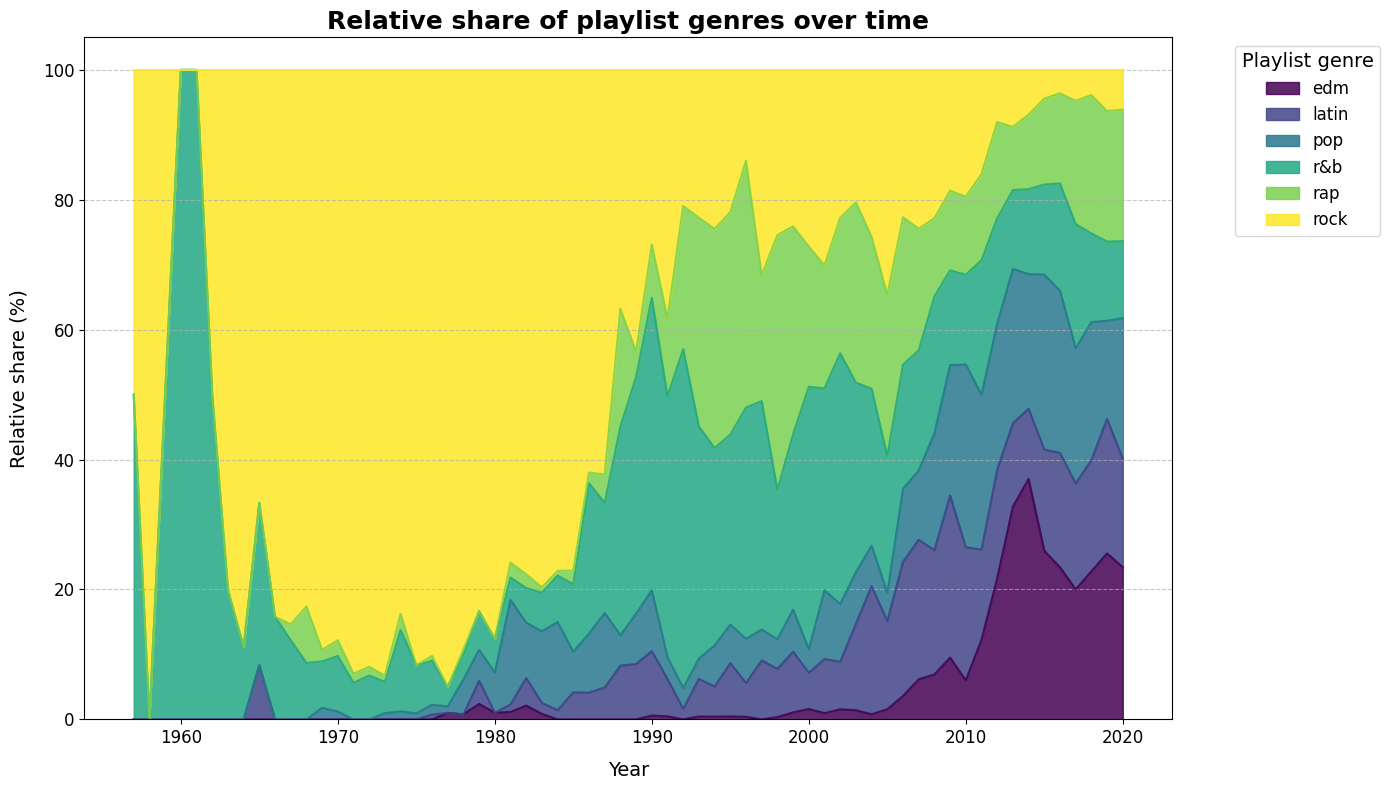

In [6]:
#calculate the relative percentages
songagg['total_items_per_year'] = songagg.groupby('year')['items'].transform('sum')
songagg['relative_share'] = (songagg['items'] / songagg['total_items_per_year']) * 100

#pivot the data to create a format suitable for the plot 
pivot_data = songagg.pivot(index = 'year', columns = 'playlist_genre', values = 'relative_share').fillna(0)

#create the 100% stacked area chart 
plt.figure(figsize = (14, 8))

#plot the data with customizations
pivot_data.plot(kind = 'area', stacked = True, colormap = 'viridis', alpha = 0.85, figsize = (14, 8))

#customize the chart
plt.title('Relative share of playlist genres over time', fontsize = 18, fontweight = 'bold', color = 'black')
plt.ylabel('Relative share (%)', fontsize = 14, labelpad = 10, color = 'black')
plt.xlabel('Year', fontsize = 14, labelpad = 10, color = 'black')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title = 'Playlist genre', bbox_to_anchor = (1.05, 1), loc = 'upper left', fontsize = 12, title_fontsize = 14)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

**2. Create a multiple line chart to show the evolution of the average song properties (only those normalized in the range 0 - 1) over time.**

In [7]:
songs.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'year', 'duration'],
      dtype='object')

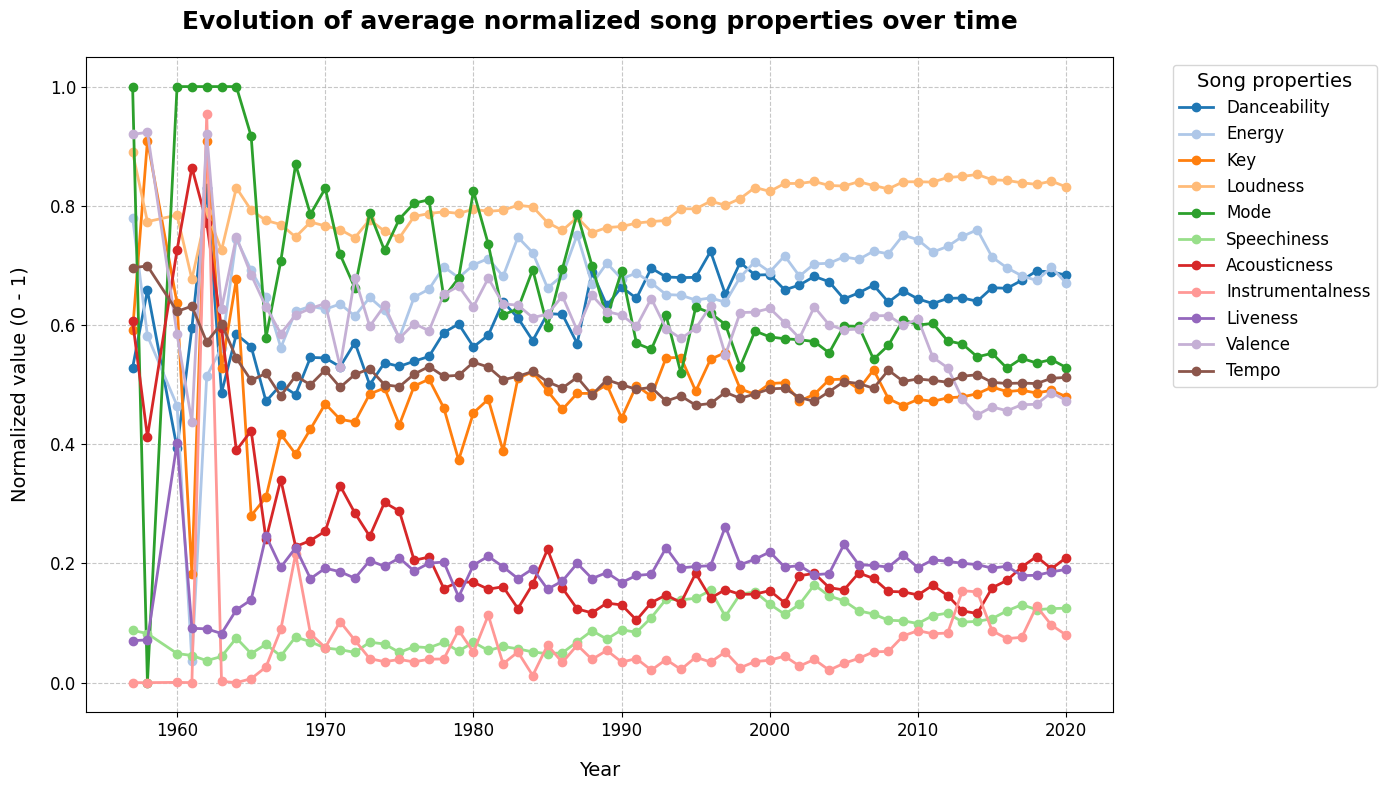

In [8]:
#normalize the selected column (0-1 range)
normalized_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
for col in normalized_columns:
    songs[col] = (songs[col] - songs[col].min()) / (songs[col].max() - songs[col].min())

#group by year and calculate the average of each normalized property
evolution_data = songs.groupby('year')[normalized_columns].mean().reset_index()

#create a multiple line chart
plt.figure(figsize = (14, 8))

#plot each property with a color 
colors = plt.cm.tab20(range(len(normalized_columns)))
for i, col in enumerate(normalized_columns):
    plt.plot(evolution_data['year'], evolution_data[col], marker = 'o', linewidth = 2, label = col.capitalize(), color = colors[i])

#customize the chart
plt.title('Evolution of average normalized song properties over time', fontsize = 18, fontweight = 'bold', color = 'black', pad = 20)
plt.xlabel('Year', fontsize = 14, labelpad = 15, color = 'black')
plt.ylabel('Normalized value (0 - 1)', fontsize = 14, labelpad = 15, color = 'black')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title = 'Song properties', bbox_to_anchor = (1.05, 1), loc = 'upper left', fontsize = 12, title_fontsize = 14)
plt.grid(axis = 'both', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

**3. Create a small multiple chart with histograms of track popularity for the different genres. Choose an optimal binning.**

/var/folders/nt/j3zdw65j5ys5rx0l1vhss5y40000gn/T/ipykernel_3310/1529827779.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


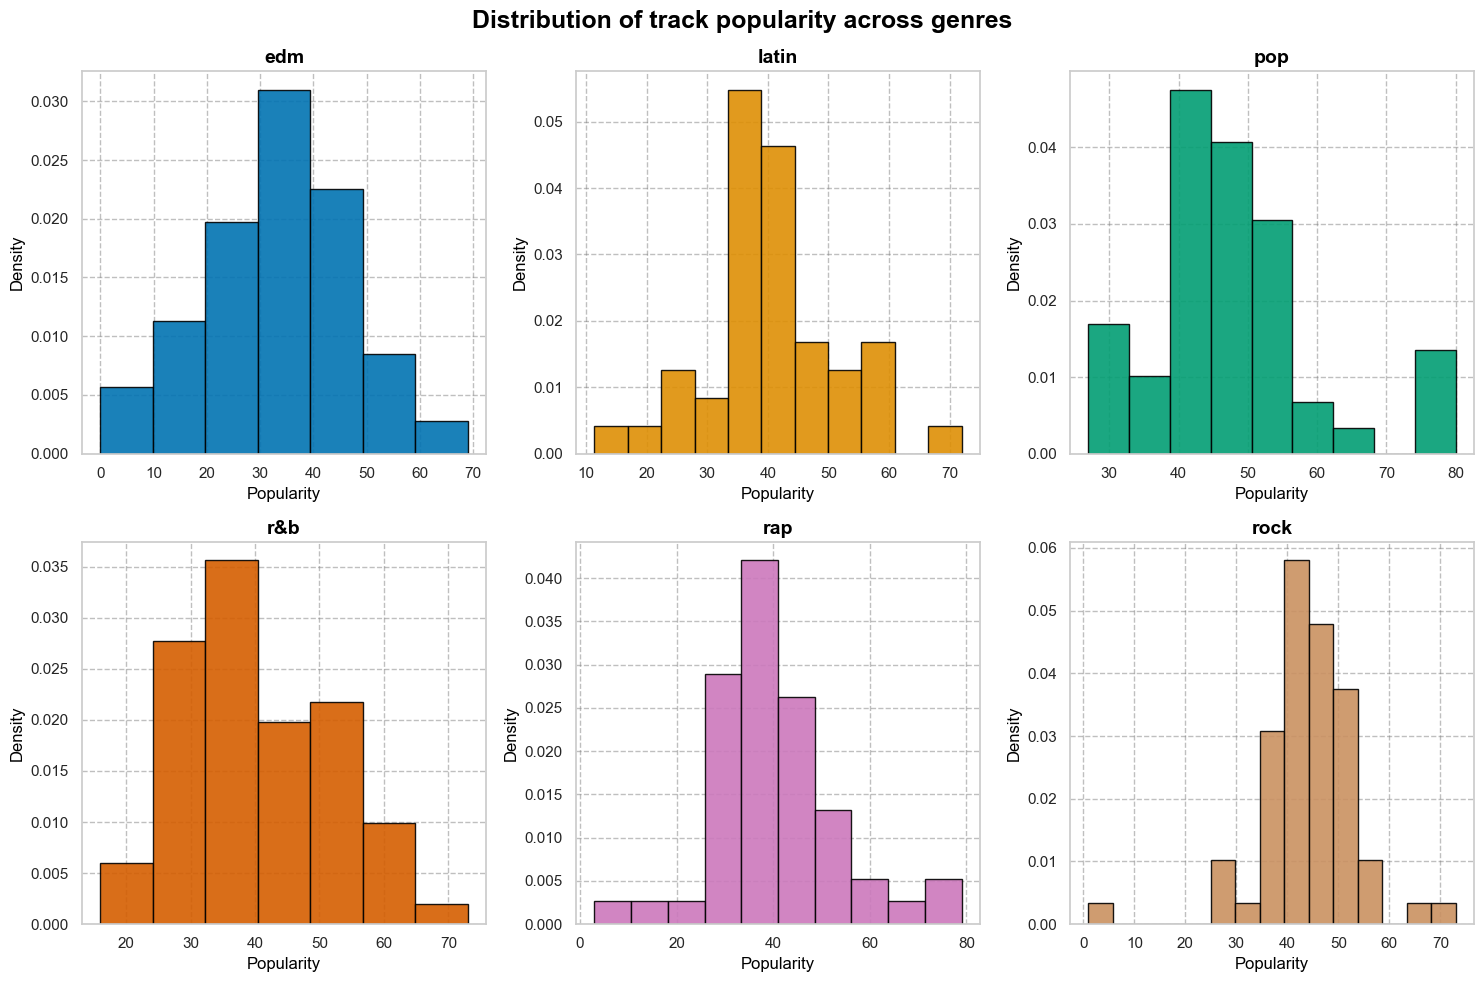

In [9]:
#set Seaborn style for a cleaner look
sns.set(style = "whitegrid")

#get unique genres
genres = songagg['playlist_genre'].unique()

#configure the grid layout
n_cols = 3
n_rows = (len(genres) // n_cols) + (len(genres) % n_cols > 0)

#create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 10), constrained_layout = True)
axes = axes.flatten()

#create a colorblind - friendly color palette
colors = sns.color_palette("colorblind", len(genres))

#iterate over the genres and create histograms
for i, genre in enumerate(genres):
    genre_data = songagg[songagg['playlist_genre'] == genre]['popularity']
    optimal_bins = np.histogram_bin_edges(genre_data, bins ='auto')
    axes[i].hist(genre_data, bins = optimal_bins, alpha = 0.9, color = colors[i], edgecolor = 'black', density = True)
    axes[i].set_title(f"{genre}", fontsize = 14, fontweight = 'bold', color = 'black')
    axes[i].set_xlabel('Popularity', fontsize = 12, color = 'black')
    axes[i].set_ylabel('Density', fontsize = 12, color = 'black')
    axes[i].grid(True, color='gray', linestyle='--', alpha=0.5)

#handle empty subplots
for j in range(len(genres), len(axes)):
    axes[j].axis('off')

fig.suptitle('Distribution of track popularity across genres', fontsize = 18, fontweight = 'bold', color = 'black')
plt.tight_layout()
plt.show()

**4. Compare the distributions of the average song duration for the different genres using a visualization idiom for statistical analysis.**

In my opinion, in this case the box plot is more appropriate than the violin plot because it effectively highlights the key statistical metrics (such as the median, quartiles and outliers) for the average song duration across genres, providing a clear and concise comparison. 

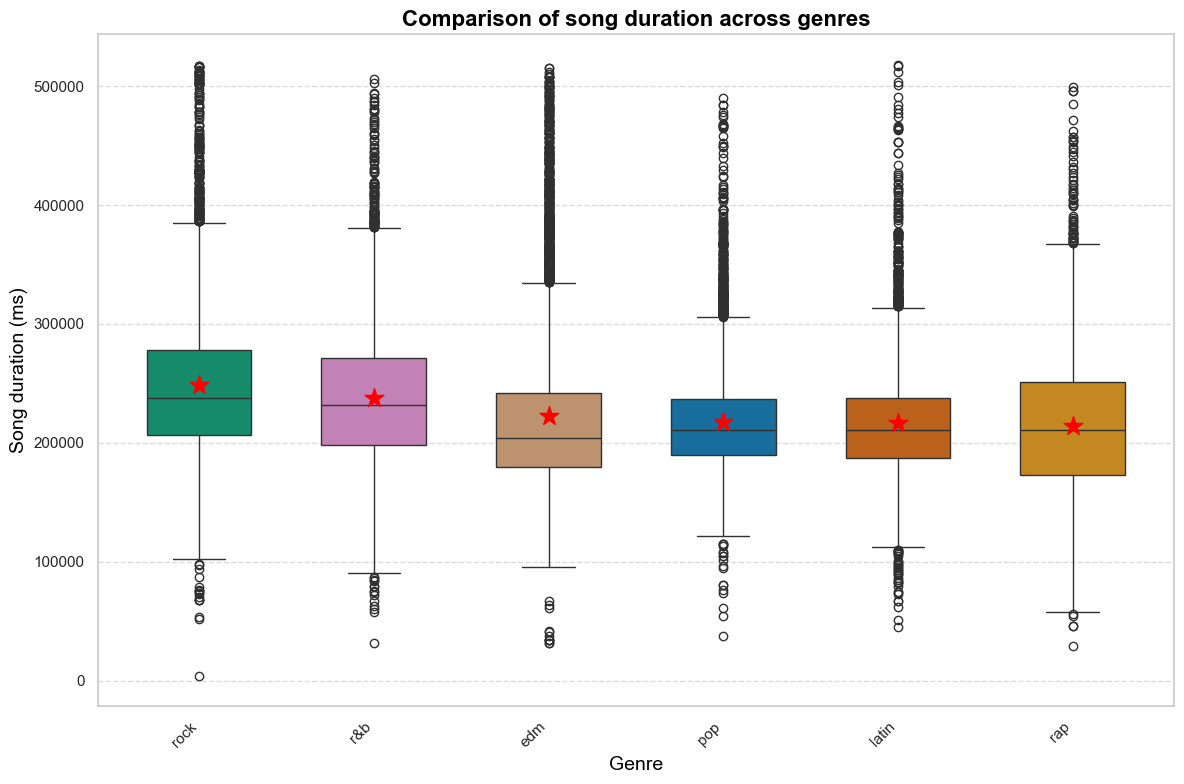

In [10]:
#set the seaborn style for clean visuals
sns.set(style = "whitegrid")

#calculate the average duration per genre and get the sorted genre order
sorted_genres = songs.groupby('playlist_genre')['duration_ms'].mean().sort_values(ascending = False).index

#create the box plot
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'playlist_genre', y = 'duration_ms', data = songs, order = sorted_genres, hue = 'playlist_genre', palette = 'colorblind', showfliers = True, width = 0.6, legend = False)
plt.title('Comparison of song duration across genres', fontsize = 16, fontweight = 'bold', color = 'black')
plt.xlabel('Genre', fontsize = 14, color = 'black')
plt.ylabel('Song duration (ms)', fontsize = 14, color = 'black')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

#add a red star to indicate the average duration for each genre
average_duration = songs.groupby('playlist_genre')['duration_ms'].mean()
for i, genre in enumerate(sorted_genres):
    plt.scatter(i, average_duration[genre], color = 'red', s = 200, zorder = 3, marker = '*')  

plt.tight_layout()
plt.show()

**5. Create a chart showing the how much the attributes (popularity, danceability, energy, loudness, acousticness, instrumentalness, liveness, valence, tempo) are correlated. Use a proper colormap.**

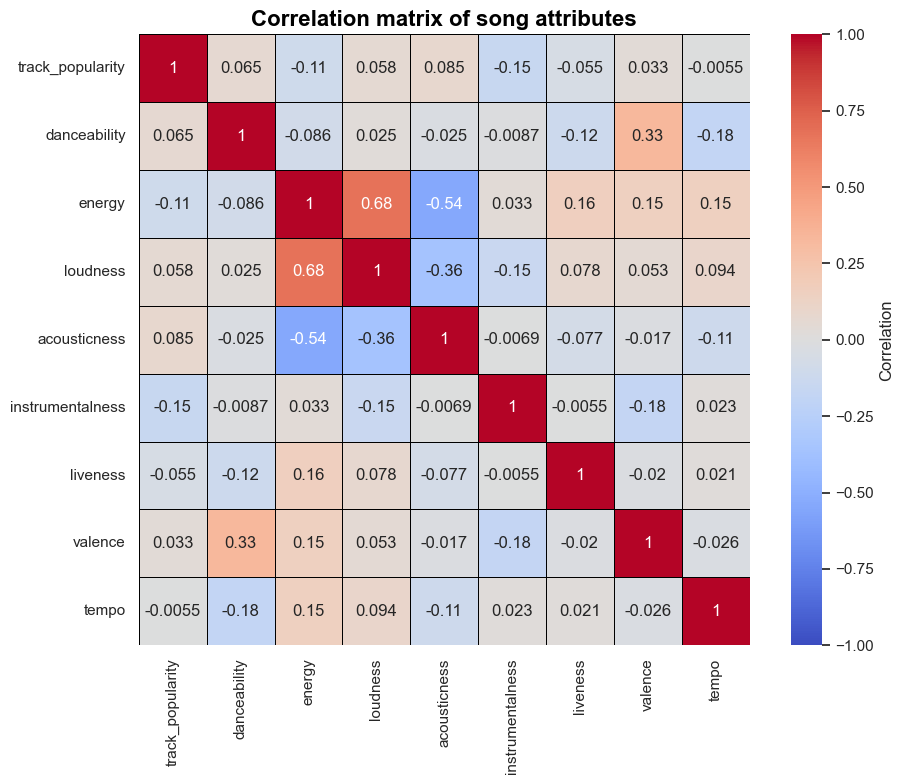

In [11]:
#list of attributes to analyze
attributes = ['track_popularity', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

#calculate the correlation matrix
correlation_matrix = songs[attributes].corr()

#create the heatmap to visualize the correlation matrix 
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', cbar_kws = {'label': 'Correlation'}, vmin=-1, vmax=1, linewidths = 0.5, square = True, linecolor = 'black')
plt.title('Correlation matrix of song attributes', fontsize = 16, fontweight = 'bold', color = 'black')
plt.tight_layout() 
plt.show()

**6. Extra task: visualize a scatter plot with songs released in 2010, representing loudness and danceability on the x - y coordinates, dots colored by genres using a different mark (pre - attentive) to make a specific artist of your interest evident.**

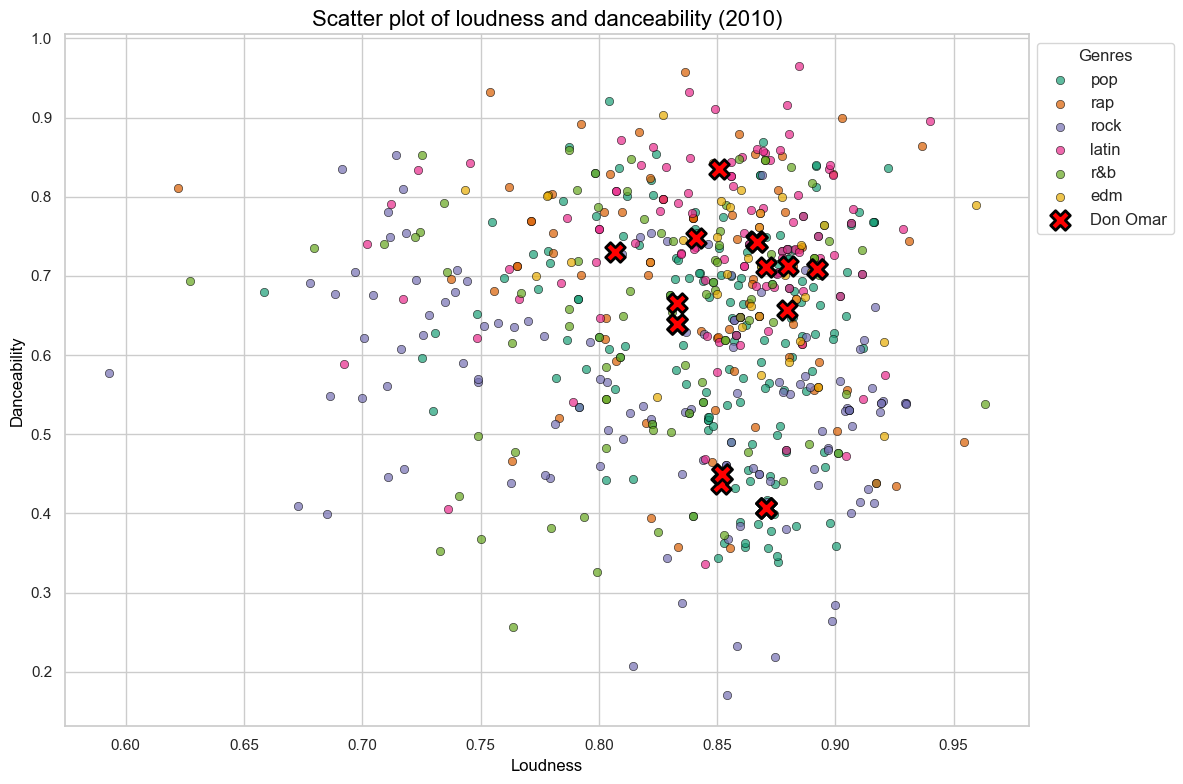

In [12]:
#filter songs released in 2010
songs_2010 = songs[songs['year'] == 2010]

#choose the artist to highlight
artist_to_highlight = 'Don Omar'

#create a dictionary of colors for unique genres (colorblind-friendly palette)
genre_unique = songs_2010['playlist_genre'].unique()
palette = sns.color_palette('Dark2', len(genre_unique))  # More contrasting color palette
genre_colors = {genre: color for genre, color in zip(genre_unique, palette)}

#create the plot
plt.figure(figsize = (12, 8))
for genre in genre_unique:
    genre_data = songs_2010[songs_2010['playlist_genre'] == genre]
    plt.scatter(genre_data['loudness'], genre_data['danceability'], label = genre, color = genre_colors[genre], alpha = 0.7, edgecolor = 'black', linewidth = 0.5)

#highlight the specific artist with a special marker
artist_data = songs_2010[songs_2010['track_artist'] == artist_to_highlight]
plt.scatter(artist_data['loudness'], artist_data['danceability'], label = f"{artist_to_highlight}", color = 'red', s = 200, marker = 'X', edgecolor = 'black', linewidth = 2)

plt.title('Scatter plot of loudness and danceability (2010)', fontsize = 16, color = 'black')
plt.xlabel('Loudness', fontsize = 12, color = 'black')
plt.ylabel('Danceability', fontsize = 12, color = 'black')
plt.legend(title = 'Genres', loc = 'upper left', bbox_to_anchor = (1, 1), fontsize = 12)
plt.tight_layout()
plt.show()